In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

In [3]:
input = pd.read_csv('plotting.csv')
print(input)

       Navigation Status       MMSI   Longitude   Latitude          Ship_Type
0                      3  525023329  106.091325  -5.905955  Unknown ship type
1                      0  525200031  105.993102  -5.950530            Tankers
2                     15  525500603  105.976063  -5.925017              Pilot
3                      0  636015031  105.716583  54.187103  Unknown ship type
4                      0  525100582   69.202130  68.680135             Cargo 
...                  ...        ...         ...        ...                ...
23145                  0  525015491  105.991068  -5.955312  Unknown ship type
23146                  0  477089300  105.999405  -5.822952  Unknown ship type
23147                 15  525024295  105.996793  -5.931458  Unknown ship type
23148                 15  525701109  106.052718  -5.590358               Tugs
23149                  8  525501481  106.101760  -5.911218              Pilot

[23150 rows x 5 columns]


In [4]:
input['Ship_Type'] = input['Ship_Type'].str.lower()
print(input['Ship_Type'].unique())

['unknown ship type' 'tankers' 'pilot' 'cargo ' 'tugs' 'passenger'
 'sailing' 'fishing' 'search and rescue vessels' 'other types of vessels'
 'high-speed craft']


In [5]:
minlon = 105
minlat = -7.5
maxlon = 106.5
maxlat = -5.5
lat0   = (maxlat + minlat) / 2
lon0   = (maxlon + minlon) / 2
lat1 = lat0 - 20


Found 1430 tankers ships.
Plotting tankers ships at coordinates: [(99002.39760176429, 154514.9064373367), (110512.28345008167, 151519.70179380325), (111046.95464937862, 154168.2485162639), (128767.36714729277, 164719.000125875), (-19616104.853127714, inf), (-19631148.752776217, inf), (-3414686.420248896, 2757844.0112284515), (100508.21645795049, 77332.16061412392), (-3486867.364453886, 10300385.5488954), (98944.07889730422, 157153.01824224123), (134830.68475942127, 164908.14042002708), (100457.70681078148, 158789.1207245998), (75394.45435587264, 181226.69511382084), (110512.11729992977, 151515.05510608188), (99021.67101976338, 154510.0940640031), (111037.98254100014, 154171.06958061154), (110706.84528177182, 152111.32143189618), (80191.20933524557, 163700.1200225911), (100512.370211826, 77250.22563250898), (-19616107.511530202, inf), (-3285339.189060106, 10187680.017761549), (100457.70681078148, 158789.45258623373), (80183.73257826257, 163698.9586112596), (-3571000.486220222, 9131274.

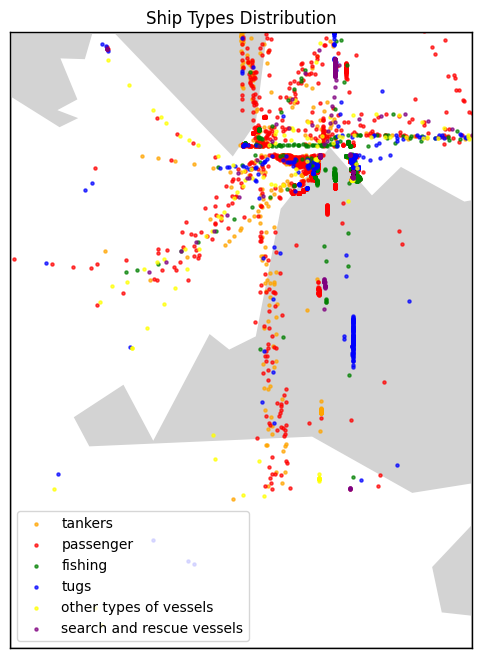

In [7]:
fig,ax=plt.subplots(figsize=(8,8))
m = Basemap(llcrnrlon=minlon,llcrnrlat=minlat,urcrnrlon=maxlon,
            urcrnrlat=maxlat,rsphere=(6378137.00,6356752.3142),
            resolution='l',projection='merc',lat_0=lat0,lon_0=lon0,
            lat_ts = lat1)
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='lightgrey',lake_color='white')
colors = {
  'tankers': 'orange',
    'passenger': 'red',      
    'fishing': 'green',
    'tugs': 'blue',
    'other types of vessels': 'yellow',
    'search and rescue vessels': 'purple',
}
for shiptype, color in colors.items():
    subset = input[input['Ship_Type'] == shiptype]
    print(f"\nFound {len(subset)} {shiptype} ships.")
    if not subset.empty:
        x, y = m(subset['Longitude'].values, subset['Latitude'].values)
        print(f"Plotting {shiptype} ships at coordinates: {list(zip(x, y))}")
        m.scatter(x, y, s=5, c=color, marker='o', alpha=0.7, label=shiptype)
    else:
        print(f"No {shiptype} ships found in the data.")    
plt.legend(loc='lower left')
plt.title('Ship Types Distribution')
plt.show()